# Deep Learning and Attribution Modeling (MNIST Fashion)
## IE 7860 Winter 2020
## Kayleigh James 

The task for this assignment: Develop and compare performance of machine learning algorithms for classifying the article images using auto-encoders as well as convolutional neural networks.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above) and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. 

Each training and test example is assigned to one of the following labels: 0 for T-shirt/top, 1 for Trouser, 2 for Pullover, 3 for Dress, 4 for Coat, 5 for Sandal, 6 for Shirt, 7 for Sneaker, 8 for Bag, and 9 for Ankle boot.

Grading Criteria:
- Were well accepted research procedures used in the analysis?
    - Justify the chosen loss function and selection of appropriate transfer functions/parameters.
    - What pre-processing techniques were employed (e.g., normalization of outputs and inputs) and why?
- Were structured experiments utilized for design, training,and evaluation of the networks? 
- Was generalization demonstrated in the designed networks? 
    - Is model performance effectively and completely evaluated?
    - What strategies have been employed and why (e.g., k-fold cross-validation strategy, regularization)?
    - If there are class-imbalances, how were they addressed?
- Were results adequately justified and explained?
- Were the results from the Auto-Encoders and CNN models adequately compared?
- The overall quality of the typed report in terms of grammar and organization.

I will be using Keras for this assignment.  Keras comes with Fashion-MNIST dataset built in.  Below we will import the necessary libraries and load in the dataset.

## Load in the Data

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
# We will use the names to replace the class number for plotting purposes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

As we can see our training set is 60,000 observations while our test set is 10,000 observations.  The size of the numpy arrays for the labels match up as well.  Now we will need to preprocess the data before we can pass it into a model.

## Preprocessing the Data

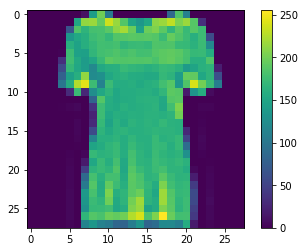

In [7]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

We can see that the image has pixels that range in value from 0-255.  We need to scale the data to be on a 0 - 1 scale in order to give our model the best chance of working.  We will perform this operation on both the training and test set.  We will then make sure our data is in the correct format so we will display the first 25 images from the dataset.

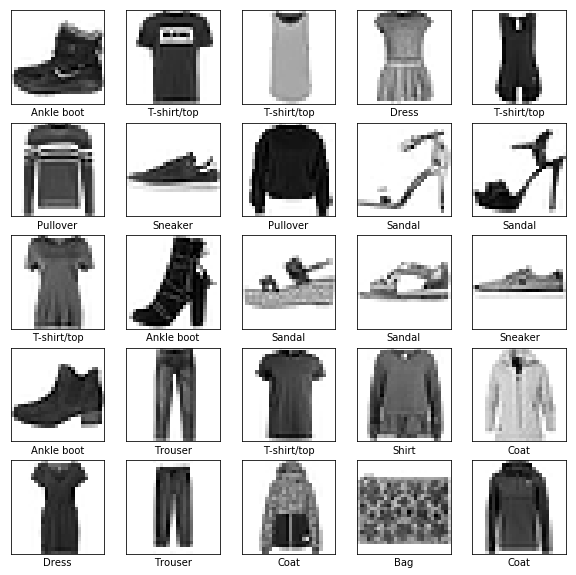

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Autoencoder

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function).

The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent.

The main practical application of an autoencoder in today's world is as dimensionality reduction for data visualization. With appropriate dimensionality and sparsity constraints, autoencoders can learn data projections that are more interesting than PCA or other basic techniques.

I will be building a sparse encoder.  A sparse encoder identifies important features through regularization.  We can regularize the autoencoder by using a sparsity constraint such that only a fraction of the nodes would have nonzero values, called active nodes.  Note that all the layers use the relu activation function, as it’s the standard with deep neural networks. The last layer uses the sigmoid activation because we need the outputs to be between [0, 1]. The input is also in the same range.  We will compare a standard encoder with a regularized one and compare the losses.  We will also take a look at how many nodes are indeed 0.

In [12]:
from keras.models import Model
from keras.layers import Input, Dense

train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_standard = Model(input_img, output_img)
autoencoder_standard.compile(optimizer='adam', loss='binary_crossentropy')
history_standard = autoencoder_standard.fit(train_images, train_images, epochs=20)

encoded_standard = Model(input_img, code)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.3301
Epoch 2/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.2912
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2868
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2854
Epoch 5/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.2847
Epoch 6/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2843
Epoch 7/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2840
Epoch 8/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2838
Epoch 9/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2836
Epoch 10/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2834
Epoch 11/20
60000/60000 [==============================] - 9s 157us/step - loss: 

In [13]:
from keras.regularizers import l1

input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu', activity_regularizer=l1(10e-6))(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
history_regularized = autoencoder_regularized.fit(train_images, train_images, epochs=20)

encoded_regularized = Model(input_img, code)

Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3429
Epoch 2/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.3038
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.2985
Epoch 4/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.2962
Epoch 5/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2948
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2939
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2930
Epoch 8/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2923
Epoch 9/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.2918
Epoch 10/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2914
Epoch 11/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2911
Epoch 12/20
60000/60000 [=========

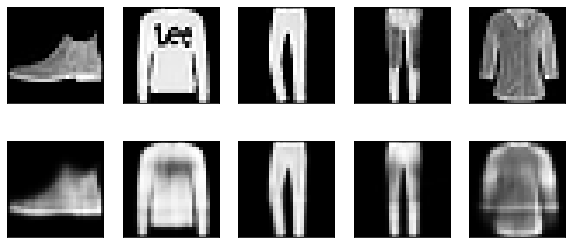

In [14]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(test_images)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()


plot_autoencoder_outputs(autoencoder_regularized, 5, (28, 28))

We can see that the regularized autoencoder does a pretty good job of maintaining clear shapes in the reconstructed images.  It is very clear what images are pants vs shirts vs ankle boots.

In [15]:
print("Standard Autoencoder Loss: ",autoencoder_standard.evaluate(test_images, test_images))
print("Regularized Autoencoder Loss: ",autoencoder_regularized.evaluate(test_images, test_images))

10000/10000 [==============================] - 1s 62us/step
Standard Autoencoder Loss:  0.28503269143104554
10000/10000 [==============================] - 1s 56us/step
Regularized Autoencoder Loss:  0.29187106590270995


We can see that both networks have very similar test losses.  However, let's see how sparse the codes are between the two models:

3.032495
0.4297632


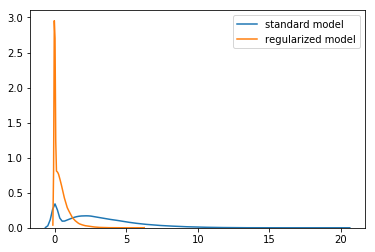

In [16]:
import seaborn as sns

standard_scores = encoded_standard.predict(test_images).ravel()
regularized_scores = encoded_regularized.predict(test_images).ravel()
sns.distplot(standard_scores, hist=False, label='standard model')
sns.distplot(regularized_scores, hist=False, label='regularized model')

print(encoded_standard.predict(test_images).mean())
print(encoded_regularized.predict(test_images).mean())

If we look at the histogram of code values for the images in the test set, we can see that a large chunk of code values in the regularized model are indeed 0, which is what we wanted. We can also see that the mean code value for the standard model is 3.03 but for the regularized model it’s 0.430, which is a considerable reduction.

## Convolutional Neural Networks

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.

In [17]:
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 

# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#one-hot encode target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#create model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#fit the model to the training set
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 210s 4ms/step - loss: 0.3926 - acc: 0.8607 - val_loss: 0.3179 - val_acc: 0.8907
Epoch 2/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2619 - acc: 0.9050 - val_loss: 0.2788 - val_acc: 0.8993
Epoch 3/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2108 - acc: 0.9236 - val_loss: 0.2617 - val_acc: 0.9099
Epoch 4/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1731 - acc: 0.9374 - val_loss: 0.2584 - val_acc: 0.9118
Epoch 5/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.1426 - acc: 0.9471 - val_loss: 0.2758 - val_acc: 0.9073
Epoch 6/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.1145 - acc: 0.9582 - val_loss: 0.3166 - val_acc: 0.9078
Epoch 7/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0957 - acc: 0.9651 - val_loss: 0.3196 - 

In [18]:
print(model.evaluate(X_test, y_test))
print(model.metrics_names)

10000/10000 [==============================] - 8s 797us/step
[0.41856476553156974, 0.9052]
['loss', 'acc']


This CNN experienced loss of 0.4186 which is much higher than the loss from the autoencoder we designed.  The model is most likely overfitting which is why the training accuracy (around 98%) is considerably higher than the test accuracy (which is around 91%).  This could be overfitting could be prevented by adding some regularization via a dropout layer.  The evidence of overfitting can be seen in the plots below.  As we go through the epochs, the training accuracy increases & training loss decreases.  However, the inverse is true for the test set.  

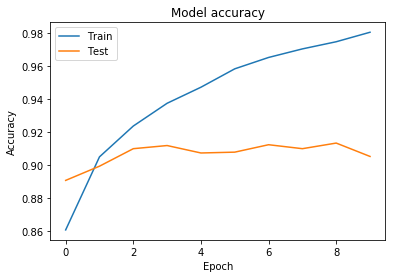

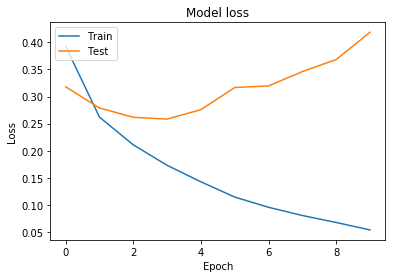

In [19]:
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Sources

- https://www.tensorflow.org/tutorials/keras/classification
- https://blog.keras.io/building-autoencoders-in-keras.html
- https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
- https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
